In [51]:
import os
import geopandas

import json
import topojson

from IPython.display import SVG, display
from shapely import geometry
%matplotlib inline

### natural earth low resolution

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
92,3441790.0,Africa,Liberia,LBR,1526.0,"POLYGON ((-7.71215938966975 4.364565944837722,..."
139,25946220.0,Africa,Sudan,SDN,88080.0,"POLYGON ((33.96339279497118 9.464285229420625,..."


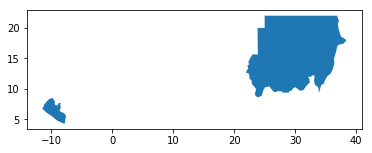

In [52]:
data = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))
data = data[(data.name == "Liberia") | (data.name == "Sudan")]
data.plot()
data.head()

In [53]:
topojson.topology(data)

{'type': 'Topology',
 'objects': {'data': {'geometries': [{'id': '92',
     'type': 'Polygon',
     'properties': {'pop_est': 3441790.0,
      'continent': 'Africa',
      'name': 'Liberia',
      'iso_a3': 'LBR',
      'gdp_md_est': 1526.0},
     'bbox': (-11.438779466182055,
      4.355755113131963,
      -7.539715135111763,
      8.541055202666925),
     'arcs': [[0]]},
    {'id': '139',
     'type': 'Polygon',
     'properties': {'pop_est': 25946220.0,
      'continent': 'Africa',
      'name': 'Sudan',
      'iso_a3': 'SDN',
      'gdp_md_est': 88080.0},
     'bbox': (21.93680999999998, 8.619729712933065, 38.410089959473225, 22.0),
     'arcs': [[1]]}],
   'type': 'GeometryCollection'}},
 'transform': {'scale': [4.984891927457455e-05, 1.764426253113057e-05],
  'translate': [-11.438779466182055, 4.355755113131963]},
 'arcs': [[[74758, 499],
   [-5255, -499],
   [-20676, 27015],
   [-18227, 43138],
   [-17091, 31011],
   [-13509, 36567],
   [4794, 18132],
   [1065, 16485],
   [9050,

In [3]:
# present timing split out in the different subtasks
ex = topojson.extract(data)
jo = topojson.join(ex, quant_factor=None)
cu = topojson.cut(jo)

In [4]:
cu

{'type': 'Topology',
 'linestrings': [<shapely.geometry.linestring.LineString at 0x119d3ddd8>,
 'bookkeeping_geoms': [[0], [1]],
 'objects': {'feature_0': {'id': '47',
   'type': 'GeometryCollection',
   'properties': {'pop_est': 83082869.0,
    'continent': 'Africa',
    'name': 'Egypt',
    'iso_a3': 'EGY',
    'gdp_md_est': 443700.0},
   'bbox': (24.70007, 22.0, 36.86623, 31.58568),
   'geometries': [{'type': 'Polygon', 'arcs': [0]}]},
  'feature_1': {'id': '139',
   'type': 'GeometryCollection',
   'properties': {'pop_est': 25946220.0,
    'continent': 'Africa',
    'name': 'Sudan',
    'iso_a3': 'SDN',
    'gdp_md_est': 88080.0},
   'bbox': (21.93680999999998, 8.619729712933065, 38.410089959473225, 22.0),
   'geometries': [{'type': 'Polygon', 'arcs': [1]}]}},
 'junctions': [<shapely.geometry.point.Point at 0x119d3db70>,
 'bookkeeping_duplicates': array([], dtype=float64),
 'bookkeeping_linestrings': array([[0., 1., 2.],
        [3., 4., 5.]])}

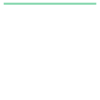

In [5]:
g1 = cu['linestrings'][1]
g1

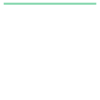

In [6]:
g2 = cu['linestrings'][4]
g2

In [7]:
g1.wkt

'LINESTRING (36.86623 22, 32.9 22, 29.02 22, 25 22)'

In [8]:
g2.wkt

'LINESTRING (25.00000000000011 22, 29.01999999999998 22, 32.89999999999998 22, 36.86622999999997 22)'

In [9]:
# %%prun -l 10
# # present timing split out in the different subtasks
# ex = topojson.extract(data)
# jo = topojson.join(ex, quant_factor=1e4)
# cu = topojson.cut(jo)
# de = topojson.dedup(cu)
# ha = topojson.hashmap(de)